# Leccion 5: Análisis visual de datos
## Objetivo: Representar relaciones complejas y distribuciones usando Seaborn

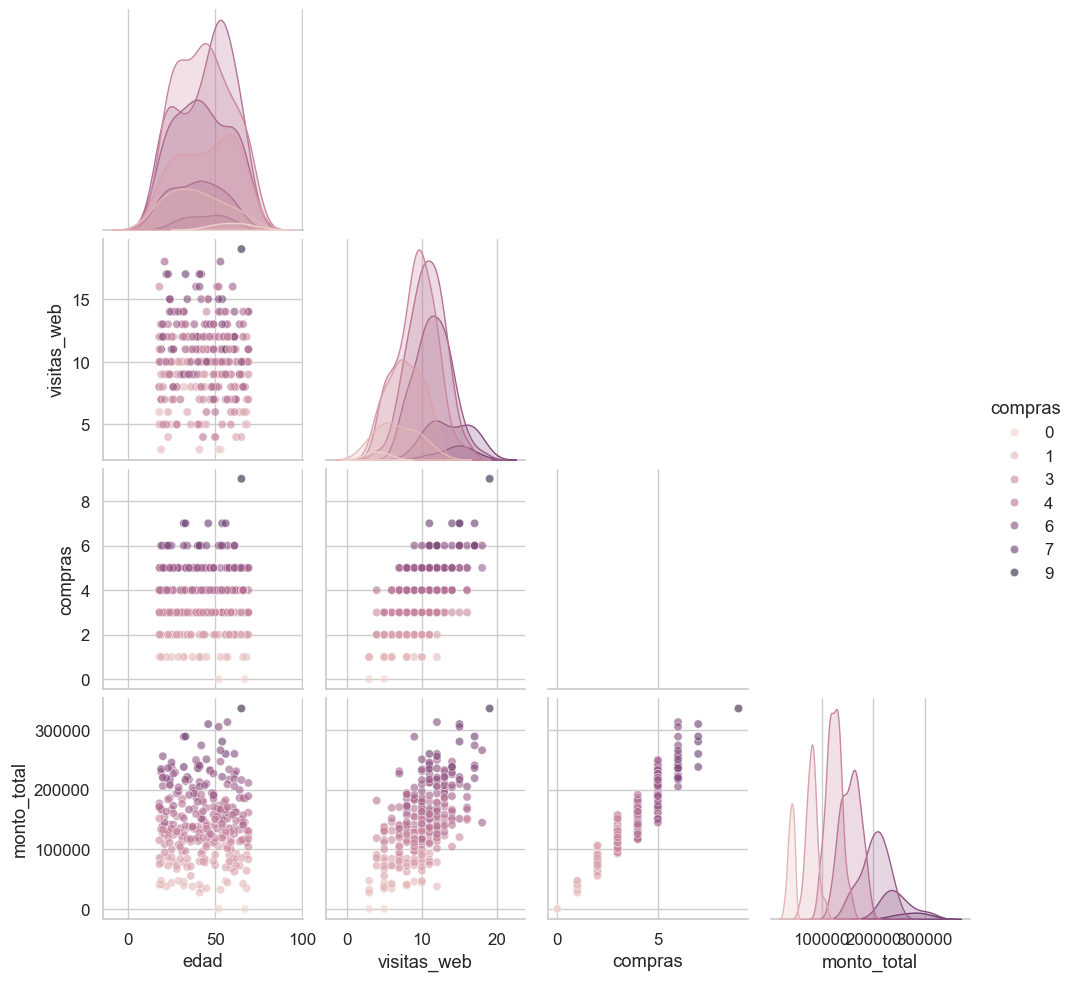

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data/comercioya.csv")
# Tema
sns.set_theme(
    style="whitegrid",
    palette="deep",
    font_scale=1.1
)

# GRÁFICO PAIRPLOT
sns.pairplot(
    data,
    vars=["edad", "visitas_web", "compras", "monto_total"],
    corner=True,
    kind="scatter",
    hue ="compras",
    diag_kind="kde",
    plot_kws={"alpha":0.6}
)
plt.show()

Insights visuales - PAIRPLOT
* Se confirma una relación lineal fuerte entre compras y monto_total, consistente con los análisis de regresión.
* La relación entre visitas_web y compras muestra tendencia positiva moderada.
* No se observa relación clara entre edad y monto_total, lo que sugiere bajo poder explicativo.

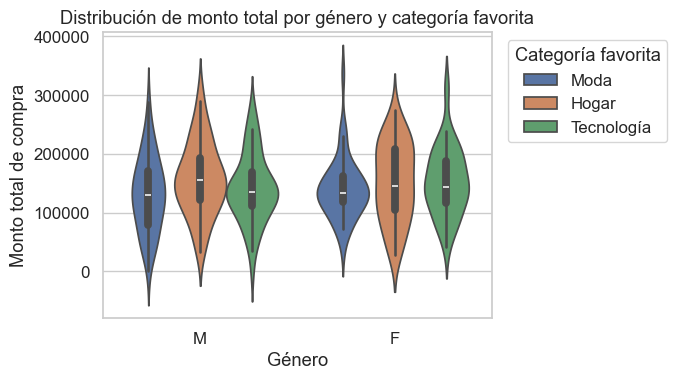

In [37]:
# VIOLINPLOT
plt.figure(figsize=(7,4))

ax = sns.violinplot(
    data=data,
    x="genero",
    y="monto_total",
    hue="categoria_favorita"
    
)

plt.title("Distribución de monto total por género y categoría favorita")
plt.xlabel("Género")
plt.ylabel("Monto total de compra")

# Leyenda 
plt.legend(
    title="Categoría favorita",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()

Insights visuales
* Se observa una distribución relativamente similar al monto_total entre hombres ymujeres.<br>
* La categoría Hogar presenta montos ligeralmente superiores en ambos géneros.<br>
* Se observa posibles valores extremos en algunas categorías, reflejando clientes congasto superior al promedio

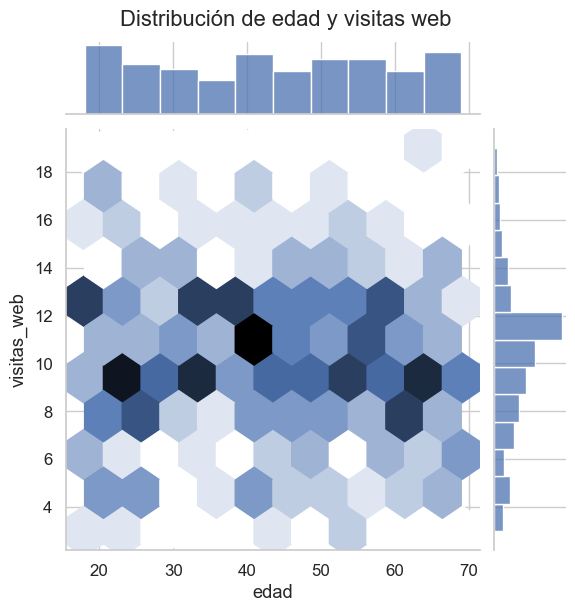

In [44]:
# JOINPLOT HEX
sns.jointplot(
    data=data,
    x="edad",
    y="visitas_web",
    kind="hex",
    height=6
)
plt.suptitle("Distribución de edad y visitas web", y=1.02)
plt.show()

Insights visuales - HEX
*  No se observa una relación fuerte entre la edad y las visitas_web.
*  La concentración de Hex sugiere que independiente la edad, las visitas se concentran de 8 a 12.

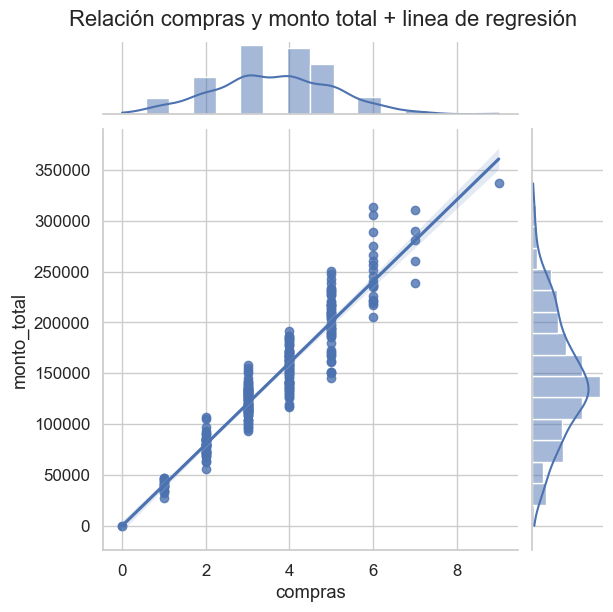

In [52]:
# JOINPLOT
sns.jointplot(
    data=data,
    x="compras",
    y="monto_total",
    kind="reg",
    height=6
)
plt.suptitle("Relación compras y monto total + linea de regresión", y=1.02)
plt.show()

Insights visuales - Joinplot
* Se observa una clara tendencia lineal ascendente.
* La concentración de puntos en rangos medios sugiere que la mayoría de clientes realiza un número moderado de compras.
* La línea de regresión confirma una relación fuerte y estable.

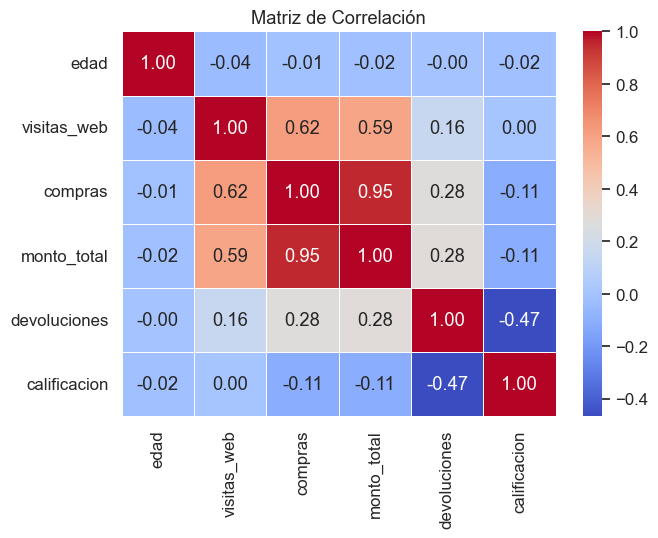

In [ ]:
# HEATMAP - MATRIZ DE CORRELACION

plt.figure(figsize=(7,5))
corr = data.corr(numeric_only=True) # Sólo valores numérericos

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5
)

plt.title("Matriz de Correlación")
plt.show()

Insights visuales - Matriz de correlación
* La correlación más fuerte se presenta entre compras y monto_total
* Se observa correlacion moderada entre visitas_web y compras, lo que sugiere influencia indirecta.
* La relación negativa entre devoluciones y calificacion sugieren impacto en la satisfacción del cliente.

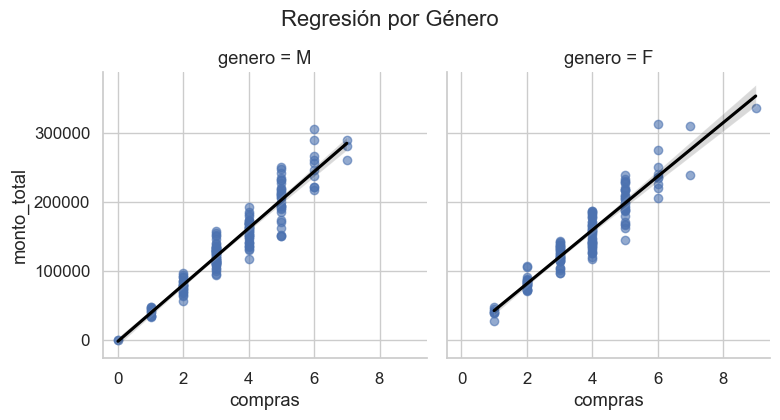

In [ ]:
# FacetGrid
g = sns.FacetGrid(data, col="genero", height=4, aspect=1)
g.map_dataframe(
    sns.regplot,
    x="compras",
    y="monto_total",
    scatter_kws={"alpha":0.6},
    line_kws={"color":"black"}
)

g.fig.suptitle("Regresión por Género", y=1.05)
plt.show()


Insights visuales - FacetGrid
* La pendiente de la relación compras–monto_total es similar entre géneros.
* No se observan diferencias estructurales significativas en el patrón de gasto.
* Esto refuerza que el comportamiento de compra es consistente independientemente del género.

## Conclusión 
Las visualizaciones confirman que la variable compras es el principal determinante del gasto total, mientras que otras variables presentan efectos secundarios o indirectos. <br> No se observan diferencias estructurales relevantes por género, y la edad no parece influir significativamente en el comportamiento de gasto.